<a href="https://colab.research.google.com/github/NguyenVanHien8502/image-classification/blob/main/test_pj3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Mount google drive

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


#2. Import library

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.api._v2.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import random
import struct
import gzip

#3. Load data from file .gz

In [65]:
#Load image train
filename = '/content/drive/MyDrive/Colab_Notebooks/train-images-idx3-ubyte.gz'

with gzip.open(filename, 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    X_train = np.frombuffer(f.read(), dtype=np.uint8)
    X_train = X_train.reshape(size, nrows, ncols)

In [74]:
#Load label train
filename = '/content/drive/MyDrive/Colab_Notebooks/train-labels-idx1-ubyte.gz'

with gzip.open(filename, 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    y_train = np.frombuffer(f.read(), dtype=np.uint8)
    y_train = y_train.reshape((size,))

In [66]:
#Load image test
filename = '/content/drive/MyDrive/Colab_Notebooks/t10k-images-idx3-ubyte.gz'

with gzip.open(filename, 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    X_test = np.frombuffer(f.read(), dtype=np.uint8)
    X_test = X_test.reshape(size, nrows, ncols)

In [75]:
#Load label test
filename = '/content/drive/MyDrive/Colab_Notebooks/t10k-labels-idx1-ubyte.gz'

with gzip.open(filename, 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    y_test = np.frombuffer(f.read(), dtype=np.uint8)
    y_test = y_test.reshape((size,))

# 4. Check data

In [31]:
X_train.shape, X_train.dtype, type(X_train)

((60000, 28, 28, 1), dtype('float32'), numpy.ndarray)

In [32]:
y_train.shape, y_train.dtype, type(y_train)

((60000,), dtype('uint8'), numpy.ndarray)

In [36]:
class_names = ["number 0", "number 1", "number 2", "number 3", "number 4", "number 5", "number 6", "number 7", "number 8", "number 9"]
class_nums = len(class_names)

In [127]:
from typing import Optional
def plot_data(X_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray] = None) -> None:
  nrows, ncols = 2, 4
  fig, axes = plt.subplots(nrows, ncols, figsize = (10, 6))

  len_x = X_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]
    img_idx = random.randint(0, len_x)
    ax.imshow(X_data[img_idx], cmap='gray')
    ax.set(xticks=[], yticks=[])
    color = "green"

    true_label_str = f"True: {class_names[y_data[img_idx]]}"

    if y_proba is not None:
      predicted_idx = np.argmax(y_proba[img_idx])
      predicted_label_str = f"\nPredict: {class_names[predicted_idx]}"
      color='red' if predicted_idx != y_data[img_idx] else color

    img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
    ax.set_xlabel(img_title, color=color, fontsize = 12)

  plt.tight_layout()
  plt.show()

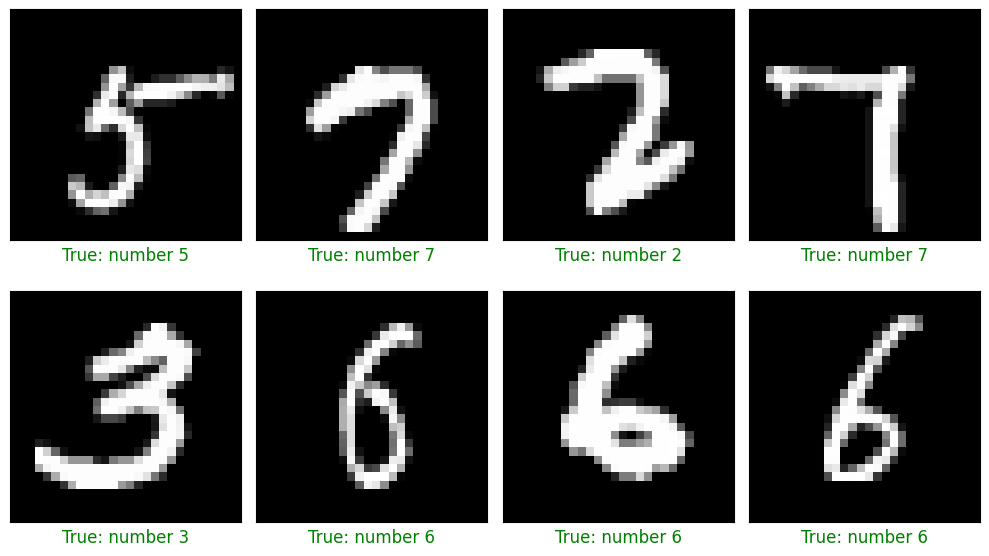

In [48]:
plot_data(X_train, y_train)

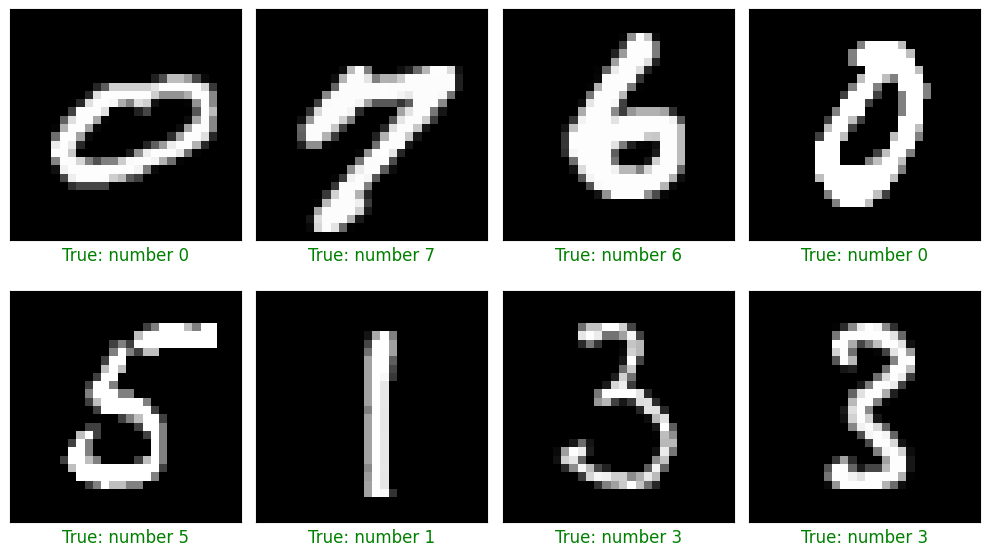

In [49]:
plot_data(X_test, y_test)

#3. Pre-processing

In [67]:
X_train = X_train.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

In [70]:
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

In [71]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [78]:
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [79]:
y_train[0], y_train_label[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

#4. Convolution neuron network

In [80]:
input_shape = (28, 28, 1)

In [81]:
def create_model_CNN():
  model = keras.models.Sequential([
      layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=input_shape),
      layers.MaxPool2D(pool_size=(2,2)),
      layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
      layers.MaxPool2D(pool_size=(2,2)),
      layers.Conv2D(filters=128, kernel_size=(3,3), activation = 'relu'),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dense(class_nums, activation='softmax'),
  ])

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [82]:
basic_model_CNN = create_model_CNN()

In [83]:
basic_model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

In [84]:
import os
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

def call_back(checkpoint_path):
  early_stopping_callback = EarlyStopping(
      patience=10,  # Số epochs không có cải thiện trước khi dừng huấn luyện
      monitor='val_loss',  # Theo dõi giá trị validation loss để quyết định có cải thiện hay không
      restore_best_weights=True,  # Sau khi dừng, khôi phục trọng số của model tại epoch có validation loss tốt nhất
      verbose=1
  )
  checkpoint_callback = ModelCheckpoint(
      filepath=checkpoint_path,
      save_weights_only=True,  # Chỉ lưu trọng số, không lưu toàn bộ mô hình.
      monitor='val_loss',  # Theo dõi giá trị validation loss để quyết định khi nào lưu trọng số
      save_best_only=True,  # Chỉ lưu trọng số của mô hình có giá trị validation loss tốt nhất trên 'monitor'
      mode='min',  # Theo dõi theo chiều giảm của 'monitor'
      verbose=1  # Hiển thị thông báo khi lưu model
  )

  return early_stopping_callback, checkpoint_callback

In [85]:
checkpoint_path = "/content/drive/MyDrive/Colab_Notebooks/model_saver/basic_CNN_weight.cp"
early_stopping_callback, checkpoint_callback = call_back(checkpoint_path=checkpoint_path)

In [86]:
epochs = 100
batch_size = 128

In [87]:
history = basic_model_CNN.fit(X_train, y_train_label,
                              epochs=epochs,
                              batch_size=batch_size,
                              validation_split=0.2,
                              callbacks=[early_stopping_callback, checkpoint_callback])

Epoch 1/100
373/375 [============================>.] - ETA: 0s - loss: 0.2295 - accuracy: 0.9314
Epoch 1: val_loss improved from inf to 0.06505, saving model to /content/drive/MyDrive/Colab_Notebooks/model_saver/basic_CNN_weight.cp
375/375 [==============================] - 5s 9ms/step - loss: 0.2287 - accuracy: 0.9316 - val_loss: 0.0651 - val_accuracy: 0.9798
Epoch 2/100
372/375 [============================>.] - ETA: 0s - loss: 0.0555 - accuracy: 0.9833
Epoch 2: val_loss improved from 0.06505 to 0.04760, saving model to /content/drive/MyDrive/Colab_Notebooks/model_saver/basic_CNN_weight.cp
375/375 [==============================] - 2s 6ms/step - loss: 0.0554 - accuracy: 0.9833 - val_loss: 0.0476 - val_accuracy: 0.9867
Epoch 3/100
373/375 [============================>.] - ETA: 0s - loss: 0.0380 - accuracy: 0.9881
Epoch 3: val_loss improved from 0.04760 to 0.04285, saving model to /content/drive/MyDrive/Colab_Notebooks/model_saver/basic_CNN_weight.cp
375/375 [=========================

In [88]:
history_dict=history.history

In [91]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [94]:
train_loss, val_loss = history_dict['loss'], history_dict['val_loss']
train_acc, val_accuracy = history_dict['accuracy'], history_dict['val_accuracy']

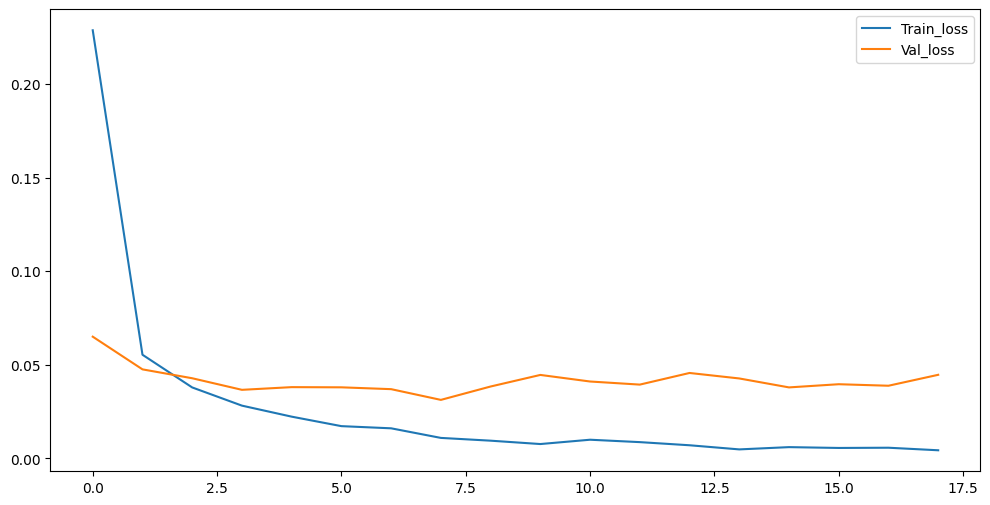

In [96]:
plt.figure(figsize=(12,6))
plt.plot(history_dict['loss'], label='Train_loss')
plt.plot(history_dict['val_loss'], label='Val_loss')
plt.legend()
plt.show()

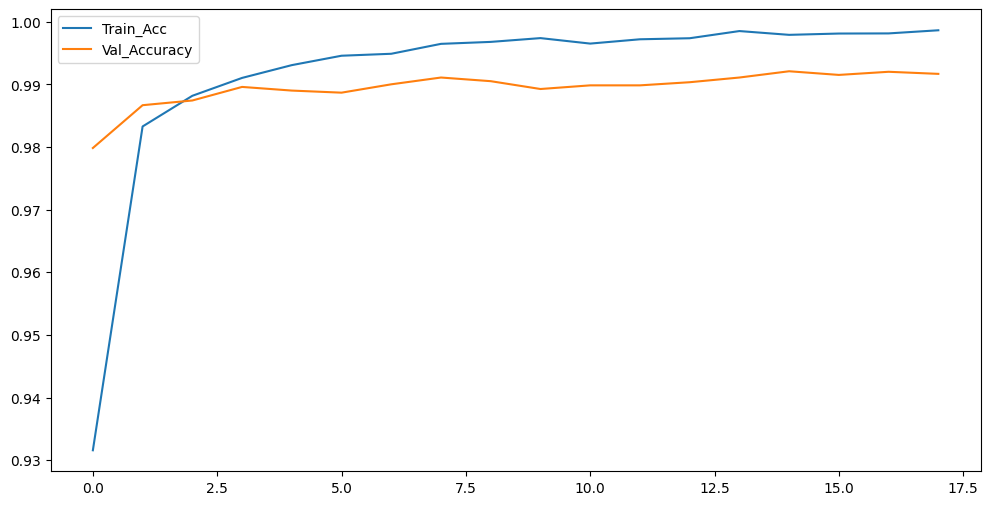

In [97]:
plt.figure(figsize=(12,6))
plt.plot(history_dict['accuracy'], label='Train_Acc')
plt.plot(history_dict['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.show()

#6. Model Evaluation

In [100]:
best_model = create_model_CNN()
best_model.load_weights(checkpoint_path)
loss, acc = best_model.evaluate(X_test, y_test_label, verbose=1)
print(f"Loss: {round(loss, 4)}\nAccuracy: {round(acc, 4)}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0260 - accuracy: 0.9921
Loss: 0.026
Accuracy: 0.9921


In [108]:
X_samples = X_test[:10]
print(X_samples.shape)
y_preds = best_model.predict(X_samples)

(10, 28, 28, 1)
1/1 [==============================] - 0s 26ms/step


In [109]:
predictions = np.argmax(y_preds, axis=1)
print(predictions)

[7 2 1 0 4 1 4 9 5 9]


In [110]:
[class_names[pred] for pred in predictions]

['number 7',
 'number 2',
 'number 1',
 'number 0',
 'number 4',
 'number 1',
 'number 4',
 'number 9',
 'number 5',
 'number 9']

In [122]:
X_test_simple = X_test[20]
print(X_test_simple.shape)

X_test_simple = X_test_simple.reshape(1, X_test_simple.shape[0], X_test_simple.shape[1], X_test_simple.shape[2])
print(X_test_simple.shape)

y_pred_simple = best_model.predict(X_test_simple)
print(y_pred_simple)

y_pred_simple_idx = np.argmax(y_pred_simple)
y_pred_simple_label = keras.utils.to_categorical(y_pred_simple_idx, class_nums)
print(y_pred_simple_label)
print(f"Label: {class_names[y_pred_simple_idx]}")

(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 21ms/step
[[1.2980521e-09 3.3095942e-09 3.8409325e-09 1.9541969e-06 9.6564356e-05
  4.8729748e-07 6.1303122e-14 1.5839726e-03 3.0461800e-07 9.9831665e-01]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Label: number 9


In [123]:
y_proba = best_model.predict(X_test)
y_proba20_idx = np.argmax(y_proba[20])
print(class_names[y_proba20_idx])

313/313 [==============================] - 3s 9ms/step
number 9


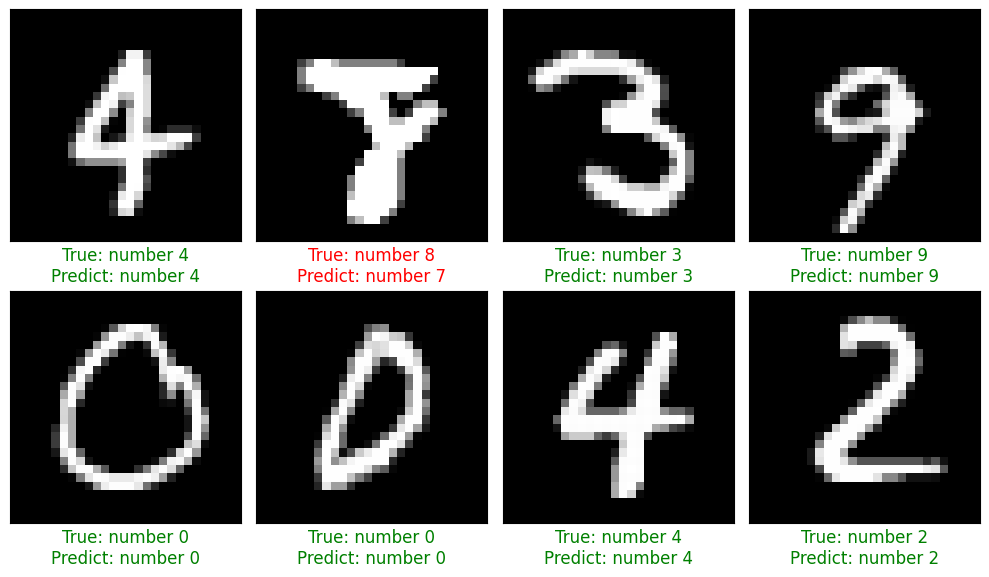

In [128]:
plot_data(X_test, y_test, y_proba)

In [134]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def calculate_metrics(y_true, y_pred):
  precision = precision_score(y_true, y_pred, average=None)
  recall = recall_score(y_true, y_pred, average=None)
  f1 = f1_score(y_true, y_pred, average=None)
  return precision, recall, f1

y_true_label = np.argmax(y_test_label, axis=1)
y_proba_label = np.argmax(y_proba, axis=1)

precision, recall, f1 = calculate_metrics(y_true_label, y_proba_label)

for i in range(len(precision)):
  print(f"Label {i}: Precision: {precision[i]}, Recall: {recall[i]}, f1: {f1[i]}")

Label 0: Precision: 0.9918864097363083, Recall: 0.9979591836734694, f1: 0.9949135300101729
Label 1: Precision: 0.9973498233215548, Recall: 0.9947136563876652, f1: 0.996029995588884
Label 2: Precision: 0.9922705314009662, Recall: 0.9951550387596899, f1: 0.9937106918238995
Label 3: Precision: 0.9891944990176817, Recall: 0.997029702970297, f1: 0.9930966469428008
Label 4: Precision: 0.9969262295081968, Recall: 0.9908350305498982, f1: 0.9938712972420838
Label 5: Precision: 0.9877094972067039, Recall: 0.9910313901345291, f1: 0.9893676552881924
Label 6: Precision: 0.9926854754440961, Recall: 0.9916492693110647, f1: 0.9921671018276763
Label 7: Precision: 0.9855212355212355, Recall: 0.9931906614785992, f1: 0.9893410852713178
Label 8: Precision: 0.9948078920041536, Recall: 0.9835728952772074, f1: 0.9891584925141972
Label 9: Precision: 0.9920159680638723, Recall: 0.9851337958374629, f1: 0.9885629040278469
